In [1]:
# To print all the cell run times, and to continuous run the timer while running the cell.
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2021-07-26 22:12:43 +05:30)


In [2]:
#Preprocessing
#1. resize (to normalize)
#2. flattening

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = [] #1, 5, 6,8 , sunflower, ball etc
images = []
flat_data = []

DATADIR = 'C:/Python/Python/ML Internship/data/train'
# 
CATEGORIES = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','R','S','T','U','V','W','X','Y','Z']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) #label encoding .. String labels to numbers
  path = os.path.join(DATADIR, category) #create path to use all images
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img),2)   
    ret, bw = cv2.threshold(img_array, 90, 255, cv2.THRESH_BINARY)
    bw_resized = resize(bw, (128,128,1))
    #print(img_array.shape)   #gives height, width, depth RGB hence 3
    #plt.imshow(img_array) #normalizes between 0 to 1
    flat_data.append(bw_resized.flatten())
    images.append(bw_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 26.6 s (started: 2021-07-26 22:12:49 +05:30)


In [3]:
# To see what are the values stored in the flat data array, after execution of the cell above 
flat_data[0]

array([1., 0., 0., ..., 0., 0., 0.])

time: 31 ms (started: 2021-07-26 22:13:19 +05:30)


In [4]:
target

array([ 0,  0,  0, ..., 33, 33, 33])

time: 0 ns (started: 2021-07-26 22:13:21 +05:30)


<BarContainer object of 34 artists>

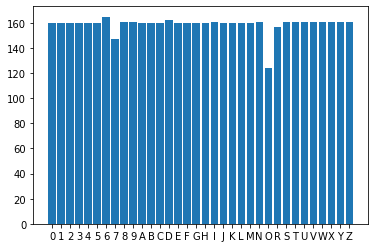

time: 312 ms (started: 2021-07-26 22:13:22 +05:30)


In [5]:
unique, count = np.unique(target, return_counts=True)
plt.bar(CATEGORIES, count)

In [6]:
#split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(flat_data, target, test_size = 0.3, random_state = 109)

time: 2.56 s (started: 2021-07-26 22:13:24 +05:30)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=17).fit(x_train, y_train)

time: 391 ms (started: 2021-07-26 22:13:36 +05:30)


In [8]:
y_pred = neigh.predict(x_test)
y_pred

array([ 8,  4,  6, ..., 17, 18, 20])

time: 5.66 s (started: 2021-07-26 22:13:38 +05:30)


In [9]:
y_test

array([ 8,  4,  6, ..., 17, 18, 20])

time: 0 ns (started: 2021-07-26 22:13:49 +05:30)


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

time: 0 ns (started: 2021-07-26 22:13:50 +05:30)


In [11]:
accuracy_score(y_pred, y_test)

0.9728897104128158

time: 0 ns (started: 2021-07-26 22:13:52 +05:30)


In [12]:
confusion_matrix(y_pred, y_test)

array([[47,  0,  0, ...,  0,  0,  0],
       [ 0, 58,  0, ...,  0,  0,  0],
       [ 0,  0, 52, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 56,  0,  0],
       [ 0,  0,  0, ...,  0, 47,  0],
       [ 0,  0,  0, ...,  0,  0, 46]], dtype=int64)

time: 0 ns (started: 2021-07-26 22:13:54 +05:30)


In [13]:
#save the model using pickle library
# Step1 if model is already trained.
import pickle

time: 0 ns (started: 2021-07-26 22:13:56 +05:30)


In [14]:

pickle.dump(neigh, open('imgknn_0toz.p','wb')) #to deploy and avoid rerunning

time: 1.05 s (started: 2021-07-26 22:14:07 +05:30)


In [15]:
# Step2 if model is already trained.
model3 = pickle.load(open('imgknn_0toz.p','rb'))

time: 500 ms (started: 2021-07-26 22:14:10 +05:30)


In [16]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
CATEGORIES = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','R','S','T','U','V','W','X','Y','Z']

time: 16 ms (started: 2021-07-26 22:14:12 +05:30)


PREDICTED OUTPUT : I


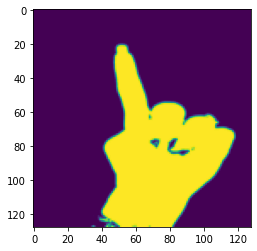

time: 3.61 s (started: 2021-07-26 22:14:20 +05:30)


In [17]:
#KNN classifier
flat_data = []
url = input('Enter your URL : ')
img_array = cv2.imread(url,2)   
ret, bw = cv2.threshold(img_array, 90, 255, cv2.THRESH_BINARY)
bw_resized = resize(bw, (128,128,1)) #normalizes between 0 to 1
flat_data.append(bw_resized.flatten())
flat_data = np.array(flat_data)
plt.imshow(bw_resized)
y_out = model3.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT : {y_out}')
# Import the required module for text
# to speech conversion
import pyttsx3

# init function to get an engine instance for the speech synthesis
engine = pyttsx3.init()

# say method on the engine that passing input text to be spoken
engine.say(y_out)

# run and wait method, it processes the voice commands.
engine.runAndWait()